<a href="https://colab.research.google.com/github/Tanisha1201/Car-booking-and-Surge-Analysis/blob/main/Car_booking_and_surge_pricing_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()  # Upload cab_booking.sql


Saving cab_booking.sql to cab_booking.sql


{'cab_booking.sql': b"CREATE TABLE users (\r\n    user_id INT PRIMARY KEY,\r\n    gender VARCHAR(1),\r\n    age INT,\r\n    signup_date DATE\r\n);\r\n\r\nCREATE TABLE drivers (\r\n    driver_id INT PRIMARY KEY,\r\n    name VARCHAR(50),\r\n    rating DECIMAL(2,1),\r\n    city VARCHAR(50)\r\n);\r\n\r\nCREATE TABLE rides (\r\n    ride_id INT PRIMARY KEY,\r\n    user_id INT,\r\n    driver_id INT,\r\n    pickup_time DATETIME,\r\n    drop_time DATETIME,\r\n    pickup_area VARCHAR(50),\r\n    drop_area VARCHAR(50),\r\n    distance_km DECIMAL(4,1),\r\n    status VARCHAR(20),\r\n    FOREIGN KEY (user_id) REFERENCES users(user_id),\r\n    FOREIGN KEY (driver_id) REFERENCES drivers(driver_id)\r\n);\r\n\r\nCREATE TABLE pricing (\r\n    ride_id INT PRIMARY KEY,\r\n    base_fare DECIMAL(5,2),\r\n    surge_multiplier DECIMAL(3,1),\r\n    total_fare DECIMAL(6,2),\r\n    FOREIGN KEY (ride_id) REFERENCES rides(ride_id)\r\n);\r\nINSERT INTO users VALUES\r\n(101, 'F', 22, '2024-01-31'),\r\n(102, 'M', 28, 

In [11]:
import sqlite3

conn = sqlite3.connect("your_database.db")  # Replace with your DB filename
cursor = conn.cursor()

# List all tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print("Tables:", cursor.fetchall())

# For each table, print its columns
tables = cursor.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()
for table in tables:
    table_name = table[0]
    cursor.execute(f"PRAGMA table_info({table_name});")
    print(f"\nColumns in {table_name}:")
    for col in cursor.fetchall():
        print(col)


Tables: []


In [2]:
!sqlite3 cab_booking.db < cab_booking.sql


/bin/bash: line 1: sqlite3: command not found


In [3]:
%load_ext sql
%sql sqlite:///cab_booking.db


In [6]:
import sqlite3

# Create a new SQLite database (or connect to existing)
conn = sqlite3.connect("cab_booking.db")
cursor = conn.cursor()

# Read the SQL file
with open("cab_booking.sql", "r") as f:
    sql_script = f.read()

# Execute the SQL script
cursor.executescript(sql_script)
conn.commit()

print("Tables created successfully!")


Tables created successfully!


In [7]:
import pandas as pd

query = """
SELECT d.city, COUNT(r.ride_id) AS total_rides
FROM rides r
JOIN drivers d ON r.driver_id = d.driver_id
GROUP BY d.city;
"""

df = pd.read_sql_query(query, conn)
print(df)


        city  total_rides
0  Bangalore            2
1    Chennai            1
2      Delhi            4
3     Mumbai            2
4       Pune            1


In [13]:
import sqlite3
import pandas as pd

# Create SQLite DB in memory (or use 'cab_booking.db' to save as file)
conn = sqlite3.connect(":memory:")
cursor = conn.cursor()

# Create tables
cursor.executescript("""
CREATE TABLE drivers (
    driver_id INTEGER PRIMARY KEY,
    name TEXT,
    city TEXT,
    rating REAL
);

CREATE TABLE customers (
    customer_id INTEGER PRIMARY KEY,
    name TEXT,
    signup_date DATE
);

CREATE TABLE rides (
    ride_id INTEGER PRIMARY KEY,
    driver_id INTEGER,
    customer_id INTEGER,
    date DATE,
    distance_km REAL,
    fare_amount REAL,
    surge_multiplier REAL,
    FOREIGN KEY (driver_id) REFERENCES drivers(driver_id),
    FOREIGN KEY (customer_id) REFERENCES customers(customer_id)
);
""")

# Insert sample data
cursor.executescript("""
INSERT INTO drivers (driver_id, name, city, rating) VALUES
(1, 'Amit', 'Delhi', 4.7),
(2, 'Priya', 'Mumbai', 4.9),
(3, 'Rahul', 'Bangalore', 4.5);

INSERT INTO customers (customer_id, name, signup_date) VALUES
(1, 'Neha', '2023-05-10'),
(2, 'Vikram', '2023-06-15'),
(3, 'Simran', '2023-06-20');

INSERT INTO rides (ride_id, driver_id, customer_id, date, distance_km, fare_amount, surge_multiplier) VALUES
(1, 1, 1, '2023-07-01', 12.5, 300, 1.0),
(2, 2, 2, '2023-07-02', 8.2, 250, 1.2),
(3, 1, 3, '2023-07-03', 15.0, 400, 1.0),
(4, 3, 1, '2023-07-04', 5.0, 150, 1.5),
(5, 2, 3, '2023-07-05', 10.0, 320, 1.0);
""")

conn.commit()


/tmp/ipython-input-234342289.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='city', y='avg_fare', palette='viridis')


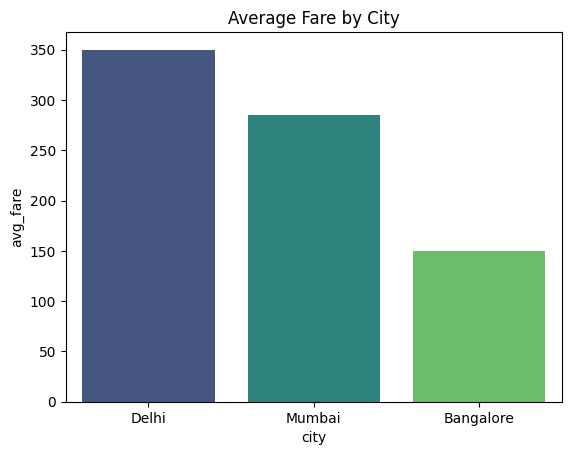

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

query = """
SELECT d.city, ROUND(AVG(r.fare_amount), 2) AS avg_fare
FROM rides r
JOIN drivers d ON r.driver_id = d.driver_id
GROUP BY d.city
ORDER BY avg_fare DESC;
"""

df = pd.read_sql_query(query, conn)

sns.barplot(data=df, x='city', y='avg_fare', palette='viridis')
plt.title("Average Fare by City")
plt.show()


In [18]:
import pandas as pd
import sqlite3

# Connect to database
conn = sqlite3.connect("cab_booking.db")  # change filename if different

# See all tables
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Tables in DB:", tables)

# See actual column names of the rides table
columns = pd.read_sql("PRAGMA table_info(rides);", conn)
print("Columns in rides table:")
print(columns)


Tables in DB:       name
0    users
1  drivers
2    rides
3  pricing
Columns in rides table:
   cid         name          type  notnull dflt_value  pk
0    0      ride_id           INT        0       None   1
1    1      user_id           INT        0       None   0
2    2    driver_id           INT        0       None   0
3    3  pickup_time      DATETIME        0       None   0
4    4    drop_time      DATETIME        0       None   0
5    5  pickup_area   VARCHAR(50)        0       None   0
6    6    drop_area   VARCHAR(50)        0       None   0
7    7  distance_km  DECIMAL(4,1)        0       None   0
8    8       status   VARCHAR(20)        0       None   0


In [19]:
print(columns)


   cid         name          type  notnull dflt_value  pk
0    0      ride_id           INT        0       None   1
1    1      user_id           INT        0       None   0
2    2    driver_id           INT        0       None   0
3    3  pickup_time      DATETIME        0       None   0
4    4    drop_time      DATETIME        0       None   0
5    5  pickup_area   VARCHAR(50)        0       None   0
6    6    drop_area   VARCHAR(50)        0       None   0
7    7  distance_km  DECIMAL(4,1)        0       None   0
8    8       status   VARCHAR(20)        0       None   0


/tmp/ipython-input-2901812983.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total_rides", y="area", data=df, palette="viridis")


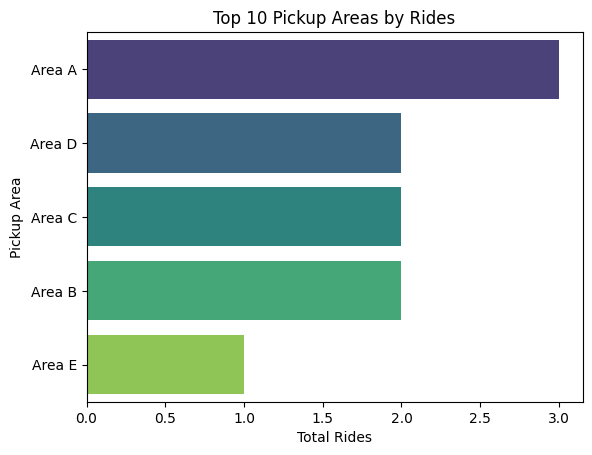

In [20]:
query = """
SELECT pickup_area AS area, COUNT(*) AS total_rides
FROM rides
GROUP BY pickup_area
ORDER BY total_rides DESC
LIMIT 10;
"""
df = pd.read_sql(query, conn)
sns.barplot(x="total_rides", y="area", data=df, palette="viridis")
plt.title("Top 10 Pickup Areas by Rides")
plt.xlabel("Total Rides")
plt.ylabel("Pickup Area")
plt.show()


/tmp/ipython-input-27100460.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total_rides", y="area", data=df, palette="mako")


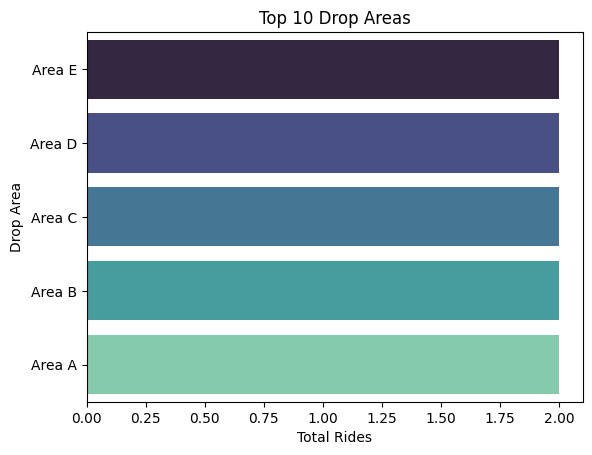

In [26]:
query = """
SELECT drop_area AS area, COUNT(*) AS total_rides
FROM rides
GROUP BY drop_area
ORDER BY total_rides DESC
LIMIT 10;
"""
df = pd.read_sql(query, conn)
sns.barplot(x="total_rides", y="area", data=df, palette="mako")
plt.title("Top 10 Drop Areas")
plt.xlabel("Total Rides")
plt.ylabel("Drop Area")
plt.show()


/tmp/ipython-input-3497459147.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total_rides", y="area", data=df, palette="viridis")


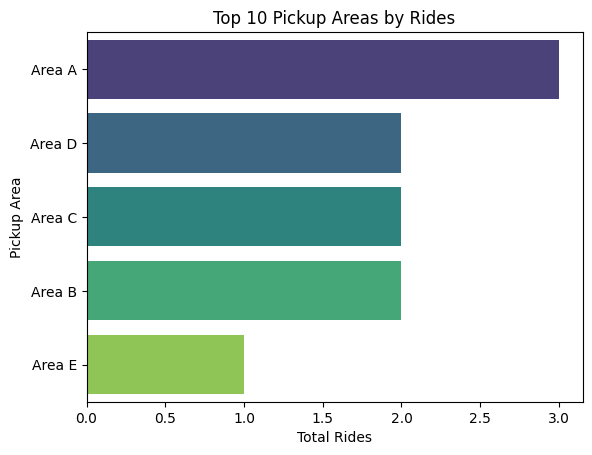

In [28]:
query = """
SELECT pickup_area AS area, COUNT(*) AS total_rides
FROM rides
GROUP BY pickup_area
ORDER BY total_rides DESC
LIMIT 10;
"""
df = pd.read_sql(query, conn)
sns.barplot(x="total_rides", y="area", data=df, palette="viridis")
plt.title("Top 10 Pickup Areas by Rides")
plt.xlabel("Total Rides")
plt.ylabel("Pickup Area")
plt.show()



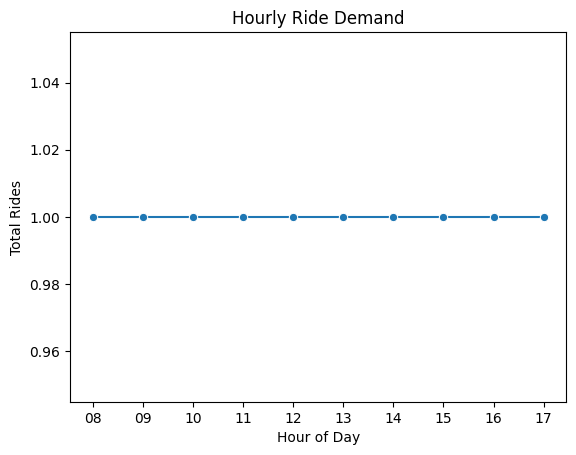

In [29]:
query = """
SELECT strftime('%H', pickup_time) AS hour, COUNT(*) AS total_rides
FROM rides
GROUP BY hour
ORDER BY hour;
"""
df = pd.read_sql(query, conn)
sns.lineplot(x="hour", y="total_rides", data=df, marker="o")
plt.title("Hourly Ride Demand")
plt.xlabel("Hour of Day")
plt.ylabel("Total Rides")
plt.show()


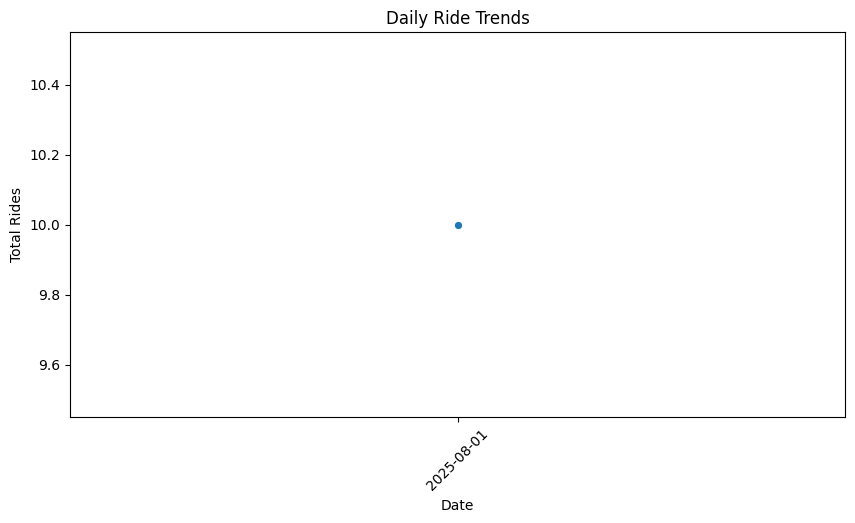

In [30]:
query = """
SELECT date(pickup_time) AS ride_date, COUNT(*) AS total_rides
FROM rides
GROUP BY ride_date
ORDER BY ride_date;
"""
df = pd.read_sql(query, conn)
plt.figure(figsize=(10,5))
sns.lineplot(x="ride_date", y="total_rides", data=df, marker="o")
plt.xticks(rotation=45)
plt.title("Daily Ride Trends")
plt.xlabel("Date")
plt.ylabel("Total Rides")
plt.show()


/tmp/ipython-input-3651061877.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="avg_distance", y="pickup_area", data=df, palette="coolwarm")


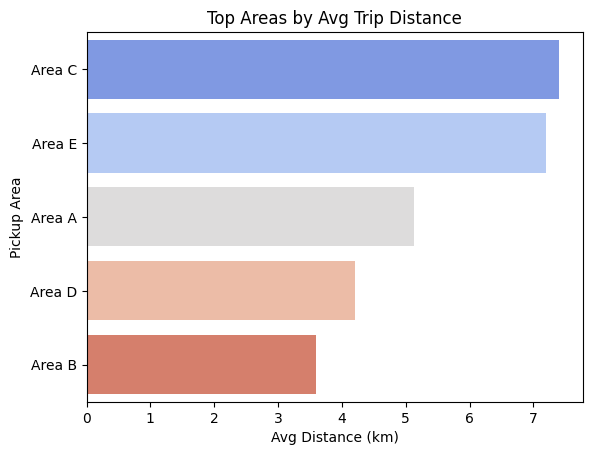

In [31]:
query = """
SELECT pickup_area, ROUND(AVG(distance_km), 2) AS avg_distance
FROM rides
GROUP BY pickup_area
ORDER BY avg_distance DESC
LIMIT 10;
"""
df = pd.read_sql(query, conn)
sns.barplot(x="avg_distance", y="pickup_area", data=df, palette="coolwarm")
plt.title("Top Areas by Avg Trip Distance")
plt.xlabel("Avg Distance (km)")
plt.ylabel("Pickup Area")
plt.show()



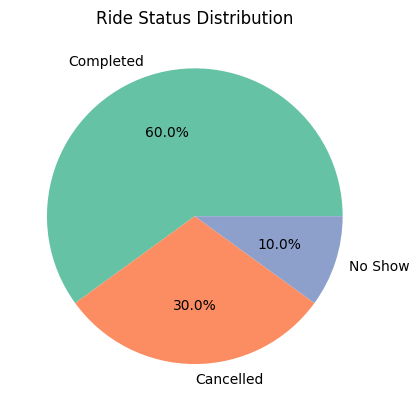

In [32]:
query = """
SELECT status, COUNT(*) AS total_rides
FROM rides
GROUP BY status
ORDER BY total_rides DESC;
"""
df = pd.read_sql(query, conn)
plt.pie(df["total_rides"], labels=df["status"], autopct="%1.1f%%", colors=sns.color_palette("Set2"))
plt.title("Ride Status Distribution")
plt.show()


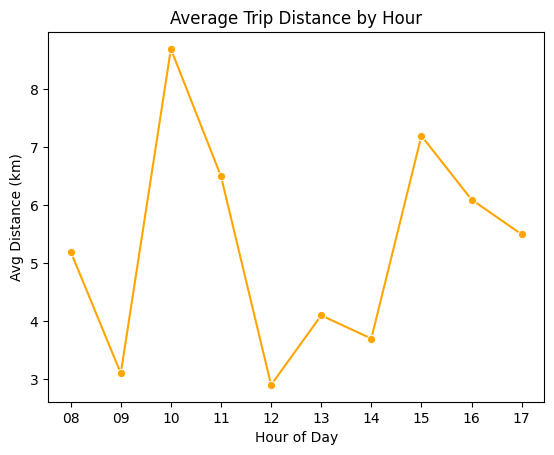

In [33]:
query = """
SELECT strftime('%H', pickup_time) AS hour, ROUND(AVG(distance_km), 2) AS avg_distance
FROM rides
GROUP BY hour
ORDER BY hour;
"""
df = pd.read_sql(query, conn)
sns.lineplot(x="hour", y="avg_distance", data=df, marker="o", color="orange")
plt.title("Average Trip Distance by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Avg Distance (km)")
plt.show()


/tmp/ipython-input-2441618069.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="completed_rides", y="driver_id", data=df, palette="Blues_r")


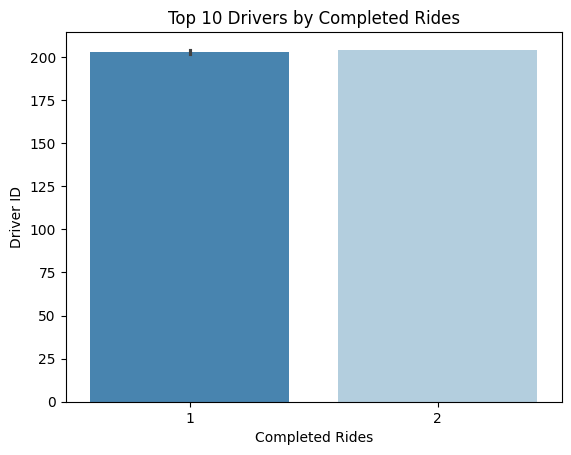

In [34]:
query = """
SELECT driver_id, COUNT(*) AS completed_rides
FROM rides
WHERE status = 'Completed'
GROUP BY driver_id
ORDER BY completed_rides DESC
LIMIT 10;
"""
df = pd.read_sql(query, conn)
sns.barplot(x="completed_rides", y="driver_id", data=df, palette="Blues_r")
plt.title("Top 10 Drivers by Completed Rides")
plt.xlabel("Completed Rides")
plt.ylabel("Driver ID")
plt.show()


/tmp/ipython-input-2994817820.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="avg_duration_mins", y="pickup_area", data=df, palette="crest")


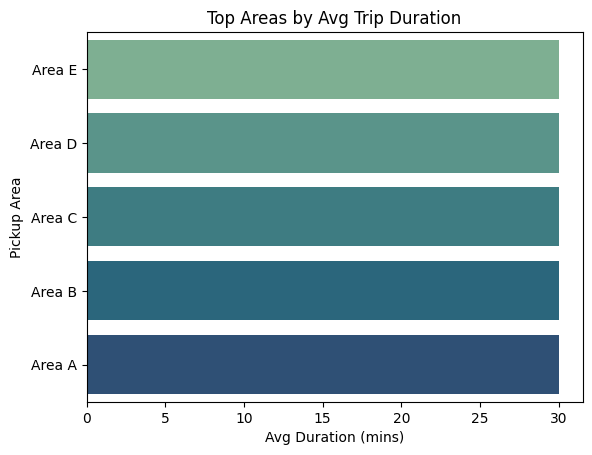

In [35]:
query = """
SELECT pickup_area, ROUND(AVG((julianday(drop_time) - julianday(pickup_time)) * 24 * 60), 2) AS avg_duration_mins
FROM rides
GROUP BY pickup_area
ORDER BY avg_duration_mins DESC
LIMIT 10;
"""
df = pd.read_sql(query, conn)
sns.barplot(x="avg_duration_mins", y="pickup_area", data=df, palette="crest")
plt.title("Top Areas by Avg Trip Duration")
plt.xlabel("Avg Duration (mins)")
plt.ylabel("Pickup Area")
plt.show()


/tmp/ipython-input-2100524566.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="cancel_percentage", y="pickup_area", data=df, palette="Reds")


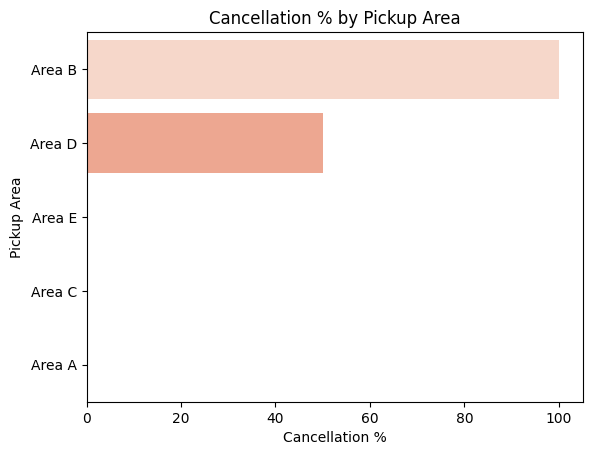

In [36]:
query = """
SELECT pickup_area,
       ROUND(100.0 * SUM(CASE WHEN status = 'Cancelled' THEN 1 ELSE 0 END) / COUNT(*), 2) AS cancel_percentage
FROM rides
GROUP BY pickup_area
ORDER BY cancel_percentage DESC
LIMIT 10;
"""
df = pd.read_sql(query, conn)
sns.barplot(x="cancel_percentage", y="pickup_area", data=df, palette="Reds")
plt.title("Cancellation % by Pickup Area")
plt.xlabel("Cancellation %")
plt.ylabel("Pickup Area")
plt.show()
